In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import predictor_of_investment_helper_methods as hm 

In [40]:
case = "IEEE118_mod1"

curts_FYMILP = hm.get_curts_FYWOI(case).pivot(values = "MW",index = "LoadLevel",columns = "Unit").sum(axis = 1)
lu_FY = hm.get_utils_FYWOI(case).pivot(values = "GWh",index = "LoadLevel",columns = ["InitialNode","FinalNode"])
net_dem_ph = hm.get_net_dem_FY(case)

# curts_fy_np = curts_FYMILP.to_numpy()
# net_dem_ph_np = net_dem_ph.to_

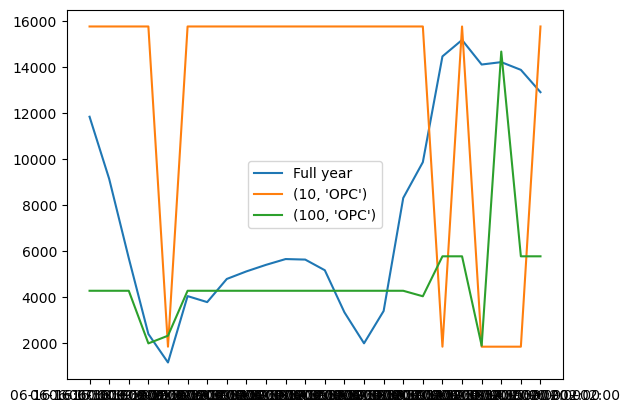

In [66]:
cm = "R&D"
nbc = 10

start_ = 4000
end_ = 4024
plt.plot(curts_FYMILP.iloc[start_:end_],label = "Full year")
for cm in ["OPC"]:
    for nbc in [10,100]:
        #Curtailment 
        curts_cm = hm.get_curts_cm(cm,nbc,case).sum(axis = 1)

        #Net demand 
        df_net_dem = hm.get_net_dem_cm(cm, nbc, case).set_index("LoadLevel")
        np_net_dem = df_net_dem["NetDemand"].to_numpy()
        plt.plot(curts_cm.iloc[start_:end_],label = (nbc,cm))

plt.legend()


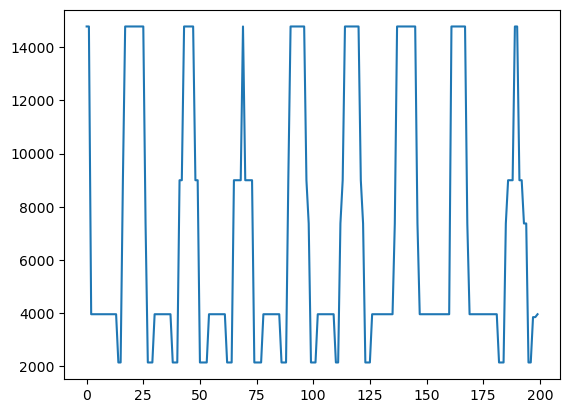

In [50]:
plt.plot(curts_cm.to_numpy()[4000:4200])

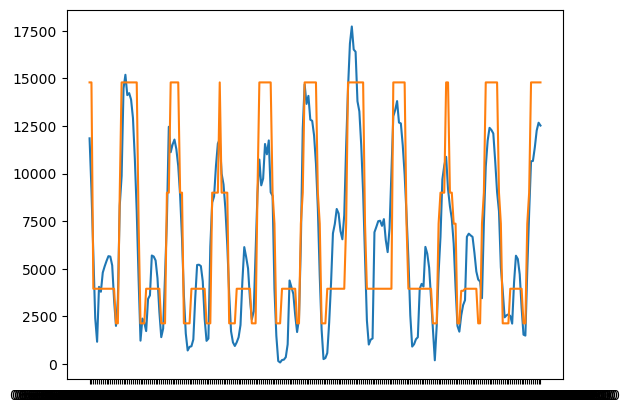

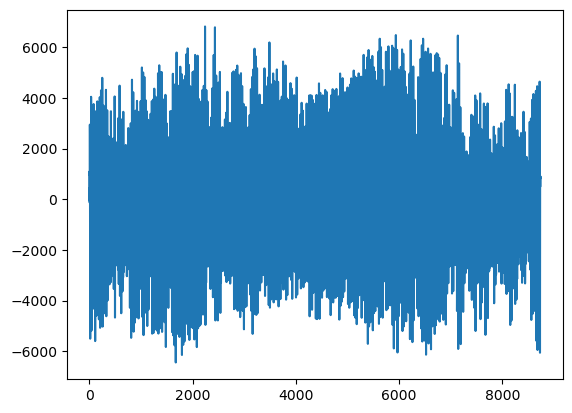

In [38]:
plt.plot(net_dem_ph.to_numpy()[:-1]-net_dem_ph.to_numpy()[1:])

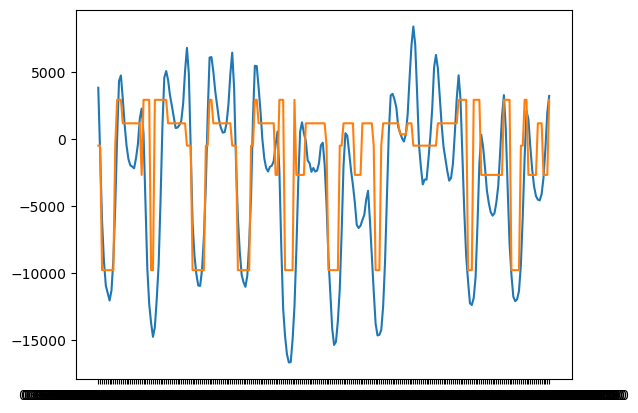

In [39]:
plt.plot(net_dem_ph.iloc[2000:2240])
plt.plot(df_net_dem["NetDemand"].iloc[2000:2240])

In [69]:
lu_FY.sum().sum()

328542.0238350485